In [1]:
%load_ext autoreload
%autoreload 2

## Disequilibrium (o2-o2sat) in surface, and its relation to temperature anomalies
- [ ] Climatological relation between o2-o2sat and temperature in surface mixed layer
- [ ] Relation of anomalies
- [ ] Imprint and impact of seasonality (wintertime subduction)

In [2]:
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
import gfdl_utils as gu
import matplotlib.pyplot as plt
import os
from dask.diagnostics import ProgressBar

In [21]:
config_id = 'ESM4_piControl_D'

ds = xr.Dataset()
if config_id == 'ESM4_piControl_D':
    pathDict = {'pp':('/archive/oar.gfdl.cmip6/ESM4/DECK/'+config_id+'/'+
                        'gfdl.ncrc4-intel16-prod-openmp/pp'),
                'out':'ts',
                'local':'monthly/5yr',
                'time':'0396*'}
    pathDict['ppname']='ocean_cobalt_omip_sfc_1x1deg'
    gridpath=gu.core.get_pathstatic(pathDict['pp'],pathDict['ppname'])
    # gu.core.issue_dmget(gridpath)
    variables = ['o2os','o2satos']
    for variable in variables:
        pathDict['add'] = variable
        path=gu.core.get_pathspp(**pathDict)
        # gu.core.issue_dmget(path)
        ds[variable] = gu.core.open_frompp(**pathDict)[variable]
    
    pathDict['ppname']='ocean_monthly_1x1deg'
    gridpath=gu.core.get_pathstatic(pathDict['pp'],pathDict['ppname'])
    # gu.core.issue_dmget(gridpath)
    variables = ['tos','mlotstmax']
    for variable in variables:
        pathDict['add'] = variable
        path=gu.core.get_pathspp(**pathDict)
        # gu.core.issue_dmget(path)
        ds[variable] = gu.core.open_frompp(**pathDict)[variable]
    grid = xr.open_dataset(gridpath)
ds = ds.squeeze()

In [22]:
# Select Southern Ocean
SOlat = -30
ds = ds.where(grid['geolat']<=SOlat,drop=True)
grid = grid.where(grid['geolat']<=SOlat,drop=True)

In [27]:
ds.groupby('time.month').mean()

<xarray.Dataset>
Dimensions:    (month: 12, lat: 48, lon: 360)
Coordinates:
  * lat        (lat) float64 -77.5 -76.5 -75.5 -74.5 ... -33.5 -32.5 -31.5 -30.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    o2os       (month, lat, lon) float32 dask.array<chunksize=(1, 48, 360), meta=np.ndarray>
    o2satos    (month, lat, lon) float32 dask.array<chunksize=(1, 48, 360), meta=np.ndarray>
    tos        (month, lat, lon) float32 dask.array<chunksize=(1, 48, 360), meta=np.ndarray>
    mlotstmax  (month, lat, lon) float32 dask.array<chunksize=(1, 48, 360), meta=np.ndarray>

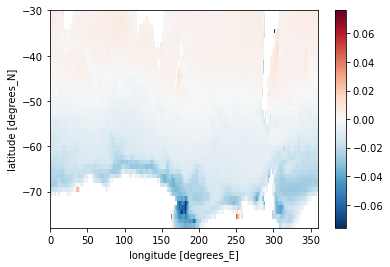

In [23]:
(ds['o2os']-ds['o2satos']).mean('time').plot()

In [19]:
gu.core.disp_varnames(pathDict['pp'],pathDict['ppname'],'monthly/5yr')

0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.evs.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.ficeberg.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.friver.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.heat_content_cond.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.heat_content_fprec.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1

0

x1deg.000101-000512.heat_content_massin.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.heat_content_massout.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.heat_content_surfwater.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.heat_content_vprec.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.Heat_PmE.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_monthly_1x1deg/ts/monthly/5yr/ocean_monthly_1x1deg.000101-000512.hfds.nc
0 /archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-pro